## Example 06 - Container Transfer Hub

**Example description:** Example of a container transfer hub, where very large container vessels deliver containers, while smaller vessels take care of the distribution to the hinterland.

* [**0. Import required libraries:**](#0.-Import-required-libraries)<br>
* [**1. Define work method:**](#1.-Define-work-method)<br>
   * [**1.1 Sites:**](#1.1-Define-the-project-sites)<br>
   * [**1.2 Equipment:**](#1.2-Define-the-project-equipment)<br>
   * [**1.3 Activities:**](#1.3-Define-the-activity)<br>
* [**2. Run the simulation:**](#2.-Run-the-simulation)<br>
* [**3. Post processing:**](#3.-Postprocessing)<br>

## 0. Import required libraries

In [1]:
# package(s) related to time, space and id
import datetime, time
import platform

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy

# spatial libraries 
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np

# digital twin package
import digital_twin.core as core
import digital_twin.model as model
import digital_twin.plot as plot

# Used for making the graph to visualize our problem
import networkx as nx

In [2]:
# Create simulation environment
simulation_start = datetime.datetime(2019, 1, 1)

my_env = simpy.Environment(initial_time = time.mktime(simulation_start.timetuple()))

my_env.epoch = time.mktime(simulation_start.timetuple())

## 1. Define work method

### 1.1 Define the project sites
You can specify a project site object by entering mix-ins:

    core.Identifiable - enables you to give the object a name
    core.Log - enables you to log all discrete events in which the object is involved
    core.Locatable - enables you to add coordinates to extract distance information and visualize
    core.HasContainer - enables you to add information on the material available at the site
    core.HasResource - enables you to add information on serving equipment
    core.HasWeather - enables you to add weather conditions

#### Create objects and specify the properties for sites you wish to create

In [3]:
def connect_sites_with_path(data_from_site, data_to_site, data_node, path):
    Nodes = []
    Edges = []
    Site = type('Site', (core.Identifiable, # Give it a name
             core.Log,          # Allow logging of all discrete events
             core.Locatable,    # Add coordinates to extract distance information and visualize
             core.HasContainer, # Add information on the material available at the site
             core.HasResource), # Add information on serving equipment
    {})                         # The dictionary is empty because the site type is generic

    Node = type('Node', (core.Identifiable, # Give it a name
             core.Log,          # Allow logging of all discrete events
             core.Locatable),   # Add coordinates to extract distance information and visualize
    {})                         # The dictionary is empty because the site type is generic

    for i, j in enumerate(path):
        if i == 0:
            data_from_site["geometry"]=shapely.geometry.Point(path[i][0], path[i][1])
            Nodes.append(Site(**data_from_site))

        elif i == len(path) - 1:
            data_to_site["geometry"]=shapely.geometry.Point(path[i][0], path[i][1])
            Nodes.append(Site(**data_to_site))
            Edges.append([Nodes[i-1], Nodes[i]])
            
        else:
            data_node["geometry"]=shapely.geometry.Point(path[i][0], path[i][1])
            data_node["name"]='node-' + str(i)
            node = Node(**data_node)
            node.name = node.id
            Nodes.append(node)
            Edges.append([Nodes[i-1], Nodes[i]])
            
    return Nodes, Edges

In [4]:
data_from_site = {"env": my_env,                  # The simpy environment defined in the first cel
                  "name": "Origin locatie",       # The name of the site
                  "geometry": [],                 # The coordinates of the project site
                  "capacity": 10_000_000,         # The capacity of the site
                  "level": 10_000_000}            # The actual volume of the site

data_inter_site = {"env": my_env,                 # The simpy environment defined in the first cel
                "name": "Overslag locatie",       # The name of the site
                "geometry": [],                   # The coordinates of the project site
                "capacity": 10_000_000,           # The capacity of the site
                "level": 0}                       # The actual volume of the site (empty of course)

data_to_site1 = {"env": my_env,                   # The simpy environment defined in the first cel
                "name": "Haven Nijmegen",         # The name of the site
                "geometry": [],                   # The coordinates of the project site
                "capacity": 5_000_000,            # The capacity of the site
                "level": 0}                       # The actual volume of the site (empty of course)

data_to_site2 = {"env": my_env,                   # The simpy environment defined in the first cel
                "name": "Haven Deventer",         # The name of the site
                "geometry": [],                   # The coordinates of the project site
                "capacity": 5_000_000,            # The capacity of the site
                "level": 0}                       # The actual volume of the site (empty of course)

data_node = {"env": my_env,                       # The simpy environment defined in the first cel
                 "name": "Intermediate site",     # The name of the site
                 "geometry": []}                  # The coordinates of the project site


In [5]:
 path_from_to_inter = [[0.4961956247618216,51.50367589686757],
                        [0.5025738662738322,51.49604982804586],
                        [4.064841994596411,51.94963274522105],
                        [4.067560378249368,51.95173269362142]]

In [6]:
path_inter_to_destination1 = [[4.067560378249368,51.95173269362142],
                             [4.076820637063388,51.95330987222201],
                             [4.079712688631274,51.953446219582],
                             [5.260911,51.820500],
                             [5.830619709457634,51.86183419049677],
                             [5.830727947258836,51.86102575658615]]

In [7]:
path_inter_to_destination2 = [[4.067560378249368,51.95173269362142],
                             [4.076820637063388,51.95330987222201],
                             [4.079712688631274,51.953446219582],
                             [5.937599,51.964640],
                             [6.197050,52.092425],
                             [6.172119444444445,52.247375]]

#### Finally create specific instances of the predefined objects with the specified properties

In [8]:
Nodes1, Edges1 = connect_sites_with_path(data_from_site, data_inter_site, data_node, path_from_to_inter)
Nodes2, Edges2 = connect_sites_with_path(data_inter_site, data_to_site1, data_node, path_inter_to_destination1)
Nodes3, Edges3 = connect_sites_with_path(data_inter_site, data_to_site2, data_node, path_inter_to_destination2)

#### Create graph

Origin locatie
e44174f5-614a-11e9-916a-60f677ba2ce0
e44174f6-614a-11e9-9dc0-60f677ba2ce0
Overslag locatie
Origin locatie - e44174f5-614a-11e9-916a-60f677ba2ce0
e44174f5-614a-11e9-916a-60f677ba2ce0 - e44174f6-614a-11e9-9dc0-60f677ba2ce0
e44174f6-614a-11e9-9dc0-60f677ba2ce0 - Overslag locatie
Overslag locatie
e4419c07-614a-11e9-96fc-60f677ba2ce0
e4419c08-614a-11e9-b171-60f677ba2ce0
e4419c09-614a-11e9-b3b4-60f677ba2ce0
e4419c0a-614a-11e9-8c8b-60f677ba2ce0
Haven Nijmegen
Overslag locatie - e4419c07-614a-11e9-96fc-60f677ba2ce0
e4419c07-614a-11e9-96fc-60f677ba2ce0 - e4419c08-614a-11e9-b171-60f677ba2ce0
e4419c08-614a-11e9-b171-60f677ba2ce0 - e4419c09-614a-11e9-b3b4-60f677ba2ce0
e4419c09-614a-11e9-b3b4-60f677ba2ce0 - e4419c0a-614a-11e9-8c8b-60f677ba2ce0
e4419c0a-614a-11e9-8c8b-60f677ba2ce0 - Haven Nijmegen
Overslag locatie
e441c335-614a-11e9-b376-60f677ba2ce0
e441c336-614a-11e9-b6c1-60f677ba2ce0
e441c337-614a-11e9-a32c-60f677ba2ce0
e441c338-614a-11e9-863b-60f677ba2ce0
Haven Deventer
Overslag l

c:\users\mrv\appdata\local\continuum\miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



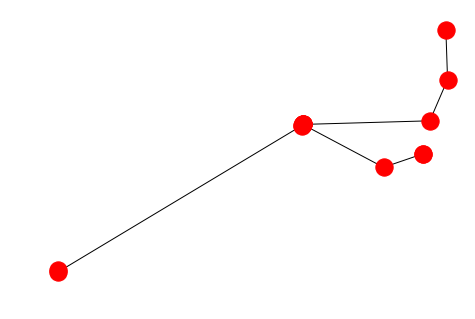

In [9]:
def add_path_to_graph(FG, positions, Nodes, Edges):
    
    for node in Nodes:
        print(node.name)
        positions[node.name] = (node.geometry.x, node.geometry.y)
        FG.add_node(node.name, geometry = node.geometry)

    for edge in Edges:
        print(edge[0].name + ' - ' + edge[1].name)
        FG.add_edge(edge[0].name, edge[1].name, weight = 1)

    return FG, positions

positions = {}
FG = nx.Graph()

FG, positions = add_path_to_graph(FG, positions, Nodes1, Edges1)
FG, positions = add_path_to_graph(FG, positions, Nodes2, Edges2)
FG, positions = add_path_to_graph(FG, positions, Nodes3, Edges3)

nx.draw(FG, positions)

### 1.2 Define the project equipment
You can specify a vessel object by entering mix-ins:

    core.Identifiable - enables you to give the object a name
    core.Log - enables you to log all discrete events in which the object is involved
    core.ContainerDependentMovable - A moving container, so capacity and location
    core.Processor - Allow for loading and unloading
    core.HasResource - Add information on serving equipment
    core.HasDepthRestriction - Add information on depth restriction 

#### First create objects with the desired properties

In [10]:
# The generic class for an object that can move and transport (a TSHD for example)
TransportProcessingResource = type('TransportProcessingResource', 
                                   (core.Identifiable,              # Give it a name
                                    core.Log,                       # Allow logging of all discrete events
                                    core.ContainerDependentMovable, # A moving container, so capacity and location
                                    core.Processor,                 # Allow for loading and unloading
                                    core.HasResource,               # Add information on serving equipment
                                    core.HasSoil,                   # Add soil object, because it moves soil
                                    core.Routeable),                # Initialize spill terms
                                   {})

#### Next specify the properties for vessel(s) you wish to create

In [11]:
# For more realistic simulation you might want to have speed dependent on the volume carried by the vessel
def compute_v_provider(v_empty, v_full):
    return lambda x: x * (v_full - v_empty) + v_empty

def compute_loading(rate):
    return lambda current_level, desired_level: (desired_level - current_level) / rate

def compute_unloading(rate):
    return lambda current_level, desired_level: (current_level - desired_level) / rate

In [12]:
# Large container vessel variables
data_container_large = {"env": my_env,                              # The simpy environment 
               "name": "Container large",                           # Name
               "geometry": Nodes1[0].geometry,                      # It starts at the "from site"
               "loading_func": compute_loading(1.5),                # Loading rate
               "unloading_func": compute_unloading(1.5),            # Unloading rate
               "capacity": 20_000,                                  # Capacity of the container vessel - TEU
               "compute_v": compute_v_provider(5, 4.5)}             # Variable speed 

In [13]:
# Small container vessel variables
data_container_small_01 = {"env": my_env,                             # The simpy environment 
               "name": "Container small_01",                           # Name
               "geometry": Nodes1[-1].geometry,                      # It starts at the "inter site"
               "loading_func": compute_loading(1.5),                # Loading rate
               "unloading_func": compute_unloading(1.5),            # Unloading rate
               "capacity": 5_000,                                   # Capacity of the container vessel - TEU
               "compute_v": compute_v_provider(5, 4.5)}             # Variable speed

In [14]:
# Small container vessel variables
data_container_small_02 = {"env": my_env,                             # The simpy environment 
               "name": "Container small_02",                           # Name
               "geometry": Nodes1[-1].geometry,                      # It starts at the "inter site"
               "loading_func": compute_loading(1.5),                # Loading rate
               "unloading_func": compute_unloading(1.5),            # Unloading rate
               "capacity": 5_000,                                   # Capacity of the container vessel - TEU
               "compute_v": compute_v_provider(5, 4.5)}             # Variable speed

#### Finally create specific instances of the predefined objects with the specified properties

In [15]:
# The simulation object
container_large = TransportProcessingResource(**data_container_large)
container_small_01 = TransportProcessingResource(**data_container_small_01)
container_small_02 = TransportProcessingResource(**data_container_small_02)

### 1.3 Define the activity

In [16]:
# Continuous simulation, stop after one year
#stop_condition = model.TimeCondition(my_env, datetime.datetime(2019, 1, 1), 
                                             #datetime.datetime(2022, 1, 1))
#stop_condition = model.LevelCondition(my_container, min_level=None, 
                                                    #max_level=5_000_000)

In [17]:
# Continuous simulation, stop after one year
stop_condition = model.TimeCondition(my_env, datetime.datetime(2019, 1, 1), 
                                             datetime.datetime(2020, 1, 1))

In [18]:
# Create activity
activity_1 = model.Activity(env = my_env,                   # The simpy environment defined in the first cel
                          name = "International transport", # We are moving soil
                          origin = Nodes1[0],               # We originate from the from_site
                          destination = Nodes1[-1],         # And therefore travel to the to_site
                          loader = container_large,         # The benefit of a TSHD, all steps can be done
                          mover = container_large,          # The benefit of a TSHD, all steps can be done
                          unloader = container_large,       # The benefit of a TSHD, all steps can be done
                          start_condition = None,           # We can start right away and do not stop
                          stop_condition = stop_condition)            # stop after 1 year simulation

In [19]:
# Create activity                      
activity_2 = model.Activity(env = my_env,                   # The simpy environment defined in the first cel
                          name = "Hinterland transport Nijmegen",    # We are moving soil
                          origin = Nodes1[-1],              # We originate from the from_site
                          destination = Nodes2[-1],         # And therefore travel to the to_site
                          loader = container_small_01,         # The benefit of a TSHD, all steps can be done
                          mover = container_small_01,          # The benefit of a TSHD, all steps can be done
                          unloader = container_small_01,       # The benefit of a TSHD, all steps can be done
                          start_condition = None,           # We can start right away and do not stop
                          stop_condition = stop_condition)            # We stop when the capacity is full

In [20]:
# Create activity                      
activity_3 = model.Activity(env = my_env,                   # The simpy environment defined in the first cel
                          name = "Hinterland transport Deventer",    # We are moving soil
                          origin = Nodes1[-1],              # We originate from the from_site
                          destination = Nodes3[-1],         # And therefore travel to the to_site
                          loader = container_small_02,         # The benefit of a TSHD, all steps can be done
                          mover = container_small_02,          # The benefit of a TSHD, all steps can be done
                          unloader = container_small_02,       # The benefit of a TSHD, all steps can be done
                          start_condition = None,           # We can start right away and do not stop
                          stop_condition = stop_condition)            # We stop when the capacity is full

### 2. Run the simulation

In [21]:
my_env.FG = FG
my_env.run()

print("\n*** Transportation of containers finished in {} ***".format(datetime.timedelta(seconds=int(my_env.now - my_env.epoch))))


Time = 2019-01-01 00:00
Start condition is satisfied, International transport transporting from Origin locatie to Overslag locatie started.

Time = 2019-01-01 00:00
Start condition is satisfied, Hinterland transport Nijmegen transporting from Overslag locatie to Haven Nijmegen started.
Nothing to move

Time = 2019-01-01 00:00
Start condition is satisfied, Hinterland transport Deventer transporting from Overslag locatie to Haven Deventer started.
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothing to move
Nothi

### 3. Postprocessing

In [22]:
vessels = [container_large, container_small_01, container_small_02]
print(vessels)

import pandas as pd
df = pd.DataFrame.from_dict(vessels[0].log)
df

[<__main__.TransportProcessingResource object at 0x00000269E5CA3400>, <__main__.TransportProcessingResource object at 0x00000269E5CA3240>, <__main__.TransportProcessingResource object at 0x00000269E5CA3278>]


,Message,Timestamp,Value,Geometry
0,loading start,2019-01-01 00:00:00.000000,0.0,POINT (0.4961956247618216 51.50367589686757)
1,loading stop,2019-01-01 03:42:13.333333,20000.0,POINT (0.4961956247618216 51.50367589686757)
2,sailing filled start,2019-01-01 03:42:13.333333,20000.0,POINT (0.4961956247618216 51.50367589686757)
3,Sailing,2019-01-01 03:45:46.023704,0.0,POINT (0.5025738662738322 51.49604982804586)
4,Sailing,2019-01-01 19:16:19.336763,0.0,POINT (4.064841994596411 51.94963274522105)
5,Sailing,2019-01-01 19:17:25.827284,0.0,POINT (4.067560378249368 51.95173269362142)
6,sailing filled stop,2019-01-01 19:17:25.827284,20000.0,POINT (4.067560378249368 51.95173269362142)
7,unloading start,2019-01-01 19:17:25.827284,20000.0,POINT (4.067560378249368 51.95173269362142)
8,unloading stop,2019-01-01 22:59:39.160617,0.0,POINT (4.067560378249368 51.95173269362142)
9,sailing empty start,2019-01-01 22:59:39.160617,0.0,POINT (4.067560378249368 51.95173269362142)


#### Vessel planning

In [31]:
activities = ['loading', 'unloading', 'sailing filled', 'sailing empty']
colors = {0:'rgb(55,126,184)', 1:'rgb(255,150,0)', 2:'rgb(98, 192, 122)', 3:'rgb(98, 141, 122)'}

plot.vessel_planning(vessels, activities, colors)

#### KML visualisation

In [28]:
plot.vessel_kml(my_env, vessels, stepsize = 10000)

In [29]:
plot.site_kml(my_env, [Nodes1[0], Nodes1[-1], Nodes2[-1], Nodes3[-1]], stepsize = 10000)

In [30]:
# open the file
if platform.system():
    !start ./vessel_movements.kml
    !start ./site_development.kml
else:
    !start explorer ./vessel_movements.kml
    !start explorer ./site_development.kml